In [1]:
import scutquant
import pandas as pd

df = pd.read_feather('D:/Desktop/future-high-freq/TA2301.XZCE.ftr')
df = df[df['datetime'] <= '2022-04-26 23:00:00']
df.set_index(['datetime', 'code'], inplace=True)

In [2]:
df = scutquant.clean(df)
df['label'] = df['close'].shift(-15) / df['open'] - 1
print(df.head(5))

                                   open    high     low   close  volume  \
datetime            code                                                  
2022-01-18 09:01:00 TA2301.XZCE  5378.0  5406.0  5378.0  5406.0     4.0   
2022-01-18 09:02:00 TA2301.XZCE  5406.0  5406.0  5406.0  5406.0     0.0   
2022-01-18 09:03:00 TA2301.XZCE  5406.0  5406.0  5406.0  5406.0     0.0   
2022-01-18 09:04:00 TA2301.XZCE  5406.0  5406.0  5406.0  5406.0     0.0   
2022-01-18 09:05:00 TA2301.XZCE  5380.0  5380.0  5380.0  5380.0     9.0   

                                    money  open_interest     label  
datetime            code                                            
2022-01-18 09:01:00 TA2301.XZCE  107990.0           13.0 -0.002231  
2022-01-18 09:02:00 TA2301.XZCE       0.0           13.0 -0.007399  
2022-01-18 09:03:00 TA2301.XZCE       0.0           13.0 -0.007399  
2022-01-18 09:04:00 TA2301.XZCE       0.0           13.0 -0.007399  
2022-01-18 09:05:00 TA2301.XZCE  241910.0           15.0 -0.

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21840 entries, (Timestamp('2022-01-18 09:01:00'), 'TA2301.XZCE') to (Timestamp('2022-04-26 23:00:00'), 'TA2301.XZCE')
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   open           21840 non-null  float64
 1   high           21840 non-null  float64
 2   low            21840 non-null  float64
 3   close          21840 non-null  float64
 4   volume         21840 non-null  float64
 5   money          21840 non-null  float64
 6   open_interest  21840 non-null  float64
 7   label          21825 non-null  float64
dtypes: float64(8)
memory usage: 2.2+ MB
None
X_mis= 0.008585164835164836
clean dataset done
pop label done


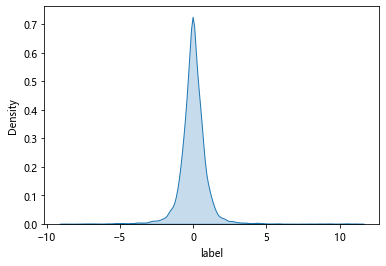

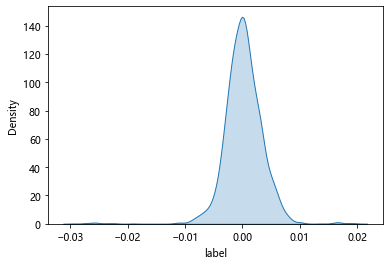

norm data done
                   open      high       low     close    volume     money  \
open           1.000000  0.999872  0.999880  0.999807  0.078322  0.082538   
high           0.999872  1.000000  0.999751  0.999892  0.080006  0.084236   
low            0.999880  0.999751  1.000000  0.999873  0.076162  0.080380   
close          0.999807  0.999892  0.999873  1.000000  0.078015  0.082239   
volume         0.078322  0.080006  0.076162  0.078015  1.000000  0.999675   
money          0.082538  0.084236  0.080380  0.082239  0.999675  1.000000   
open_interest  0.528312  0.529387  0.527185  0.528291  0.141730  0.144115   

               open_interest  
open                0.528312  
high                0.529387  
low                 0.527185  
close               0.528291  
volume              0.141730  
money               0.144115  
open_interest       1.000000  
To solve multicollinearity problem, orthogonal method will be applied
PCA done
PC3    1.724467
PC6    1.655457
PC7    1.

In [3]:
x_train, x_test, y_train, y_test, ymean, ystd = scutquant.AutoProcessor(df, y='label', norm='r')

In [4]:
model = scutquant.AutoLrg(x_train, y_train)

ols method will be used


In [5]:
pred = model.predict(x_test)
pred = pd.Series(list(pred), index=y_test.index)
pred += ymean
pred *= ystd
print('pearson_corr=', scutquant.pearson_corr(pred, y_test))

pearson_corr= -0.09092966517135667
